In [ ]:
!unzip /content/Pothole_Segmentation_YOLOv8.zip -d /content

In [ ]:
import os
import yaml

dataset_path = '/content/Pothole_Segmentation_YOLOv8'
yaml_file_path = os.path.join(dataset_path, 'data.yaml')


In [ ]:
!pip install ultralytics

import warnings
warnings.filterwarnings('ignore')
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
from PIL import Image
from collections import deque
from ultralytics import YOLO
from IPython.display import Video

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
model = YOLO('yolov8s-seg.pt')

100%|██████████| 22.8M/22.8M [00:00<00:00, 116MB/s] 


# First Model Fine-tuning

In [ ]:
# Load the pre-trained YOLOv8 nano segmentation model
model = YOLO('yolov8n-seg.pt')

100%|██████████| 6.74M/6.74M [00:00<00:00, 104MB/s]


In [ ]:
results = model.train(
   data=yaml_file_path,
   epochs=100,
   imgsz=640,
   patience=15,
   batch=32,
   optimizer='AdamW',
   lr0=0.001,
   lrf=0.1,
   device=0,
   seed=42,
   dropout=0.25
)

Ultralytics 8.3.138 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/PotholeDataset/Pothole_Segmentation_YOLOv8/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.25, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=15, perspective=0.

100%|██████████| 755k/755k [00:00<00:00, 27.1MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n-seg summary: 151 layers, 3,263,811 parameters, 3,263,795 gradients, 12.1 GFLOPs

Transferred 381/417 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 82.3MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 767.9±286.8 MB/s, size: 55.0 KB)


train: Scanning /content/PotholeDataset/Pothole_Segmentation_YOLOv8/train/labels... 680 images, 0 backgrounds, 0 corrupt: 100%|██████████| 680/680 [00:00<00:00, 1546.88it/s]

train: New cache created: /content/PotholeDataset/Pothole_Segmentation_YOLOv8/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 436.6±74.8 MB/s, size: 98.1 KB)


val: Scanning /content/PotholeDataset/Pothole_Segmentation_YOLOv8/valid/labels... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 1205.57it/s]

val: New cache created: /content/PotholeDataset/Pothole_Segmentation_YOLOv8/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.96G      1.522       3.41      2.599      1.472         44        640: 100%|██████████| 22/22 [00:21<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]

                   all         60        201    0.00965      0.209     0.0225    0.00807    0.00574      0.124    0.00373   0.000967



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.09G      1.447      2.485      1.646      1.399         25        640: 100%|██████████| 22/22 [00:19<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]

                   all         60        201     0.0683     0.0398      0.016    0.00561    0.00703      0.114    0.00597    0.00153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.12G      1.399      2.348      1.507      1.377         24        640: 100%|██████████| 22/22 [00:18<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.25s/it]

                   all         60        201      0.298      0.184      0.145     0.0688      0.298      0.174      0.134     0.0524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.14G       1.36       2.22      1.402      1.339         32        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.68s/it]

                   all         60        201      0.255      0.179      0.136     0.0586      0.293      0.134      0.119     0.0441



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.16G      1.379      2.222      1.365      1.332         28        640: 100%|██████████| 22/22 [00:16<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]

                   all         60        201      0.506      0.338      0.381      0.173      0.521      0.348      0.368      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.18G      1.349      2.175      1.269      1.322         40        640: 100%|██████████| 22/22 [00:16<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

                   all         60        201      0.489      0.308      0.322      0.138      0.531      0.316       0.34      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100       6.2G      1.339      2.139      1.257        1.3         41        640: 100%|██████████| 22/22 [00:16<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.58s/it]

                   all         60        201      0.322      0.313      0.259      0.134      0.323      0.254      0.205     0.0971



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.21G      1.308      2.145      1.229       1.31         16        640: 100%|██████████| 22/22 [00:18<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.75s/it]

                   all         60        201      0.492      0.592      0.521      0.275      0.531      0.522      0.523      0.263



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.23G      1.291      2.073      1.171      1.293         32        640: 100%|██████████| 22/22 [00:16<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.68s/it]

                   all         60        201      0.567      0.542      0.537      0.304       0.55      0.532      0.512      0.266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.25G      1.273      2.075      1.148      1.259         46        640: 100%|██████████| 22/22 [00:20<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]

                   all         60        201      0.449      0.527      0.416      0.202       0.49      0.458      0.382      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.27G      1.246      2.013      1.092      1.246         47        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.63s/it]

                   all         60        201      0.595      0.537       0.55      0.312      0.604      0.522      0.556      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.29G      1.257       1.98      1.077      1.255         47        640: 100%|██████████| 22/22 [00:17<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]

                   all         60        201      0.646      0.555      0.595      0.321      0.671      0.582       0.61      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.31G      1.221      1.931       1.06      1.239         37        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

                   all         60        201      0.722      0.498      0.595      0.328       0.71      0.522      0.594      0.327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.32G      1.194      1.928      1.013      1.219         39        640: 100%|██████████| 22/22 [00:16<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]

                   all         60        201      0.624      0.587      0.624      0.384      0.692      0.562       0.64      0.345



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.34G      1.179      1.878     0.9857        1.2         51        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.66s/it]

                   all         60        201      0.591      0.474      0.475      0.249      0.549      0.443      0.431      0.214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.36G      1.161       1.83     0.9396      1.197         27        640: 100%|██████████| 22/22 [00:16<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]

                   all         60        201      0.529      0.488      0.463      0.251      0.523      0.483      0.451      0.225



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.38G       1.16      1.849     0.9464      1.198         25        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.78s/it]

                   all         60        201      0.628      0.604      0.626      0.348      0.644       0.62      0.656      0.359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100       6.4G       1.16      1.838     0.9542      1.198         39        640: 100%|██████████| 22/22 [00:16<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.66s/it]

                   all         60        201      0.628      0.592      0.633      0.372      0.688      0.567      0.635      0.351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.42G      1.151      1.824     0.9435      1.178         29        640: 100%|██████████| 22/22 [00:17<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]

                   all         60        201      0.646      0.627      0.642      0.355      0.668      0.597      0.647      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.44G      1.141      1.796     0.8995      1.182         23        640: 100%|██████████| 22/22 [00:17<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]

                   all         60        201      0.632      0.597       0.61      0.347      0.627      0.592      0.593      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.46G      1.135      1.822     0.9246      1.188         31        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]

                   all         60        201      0.629      0.589      0.617      0.373      0.622      0.562      0.589      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.47G      1.077      1.795     0.8634      1.168         21        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.57s/it]

                   all         60        201      0.518      0.557      0.493      0.269      0.515      0.512      0.469      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.49G      1.109      1.758     0.8448      1.171         36        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.39s/it]

                   all         60        201      0.634      0.622      0.618      0.352      0.654      0.637       0.65      0.336



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.51G      1.082      1.762     0.8658      1.149         38        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.59s/it]

                   all         60        201      0.656      0.646      0.641      0.374      0.696      0.682      0.685       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.53G      1.077      1.751     0.8513      1.155         31        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.67s/it]

                   all         60        201      0.641      0.632      0.625      0.348      0.665      0.603      0.632      0.345



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.54G      1.086      1.774     0.8401      1.145         34        640: 100%|██████████| 22/22 [00:18<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.74s/it]

                   all         60        201      0.715      0.597      0.646      0.363      0.699      0.637      0.654      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.57G      1.055      1.716      0.818      1.138         38        640: 100%|██████████| 22/22 [00:16<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.56s/it]

                   all         60        201      0.668      0.612      0.624      0.336      0.668      0.582      0.617      0.336



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.58G      1.057      1.742     0.8334      1.143         38        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]

                   all         60        201      0.599       0.67      0.636      0.359      0.601       0.69      0.662      0.357



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100       6.6G      1.065      1.689     0.8184      1.145         45        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.55s/it]

                   all         60        201      0.685      0.577      0.624      0.349      0.691      0.582      0.634      0.348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.62G      1.062      1.708     0.8153      1.135         60        640: 100%|██████████| 22/22 [00:16<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.49s/it]

                   all         60        201      0.643      0.601      0.607      0.344      0.696      0.569      0.605      0.335



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.64G      1.016      1.641     0.7548      1.114         34        640: 100%|██████████| 22/22 [00:16<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.60s/it]

                   all         60        201      0.639      0.633      0.637      0.367      0.664      0.657      0.673      0.347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.66G     0.9836      1.588     0.7215      1.097         32        640: 100%|██████████| 22/22 [00:16<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all         60        201      0.704      0.592       0.68      0.407      0.741      0.607      0.702      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.68G     0.9979      1.615     0.7343       1.11         23        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.69s/it]

                   all         60        201      0.735      0.637      0.691      0.402      0.752      0.652      0.719      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100       6.7G      1.011      1.617     0.7448      1.117         37        640: 100%|██████████| 22/22 [00:16<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.69s/it]

                   all         60        201      0.634      0.597      0.641       0.38      0.617      0.622      0.641      0.355



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.71G     0.9992      1.604     0.7292      1.099         41        640: 100%|██████████| 22/22 [00:16<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]

                   all         60        201      0.709      0.617      0.657      0.385       0.71      0.608      0.653      0.356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.73G     0.9879      1.593     0.7337      1.089         32        640: 100%|██████████| 22/22 [00:16<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]

                   all         60        201      0.661       0.64      0.655      0.377      0.666      0.645      0.667      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.75G     0.9935      1.586     0.7078      1.095         39        640: 100%|██████████| 22/22 [00:16<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.72s/it]

                   all         60        201      0.665      0.642      0.656      0.376      0.697      0.682      0.685      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.77G     0.9898      1.598     0.7371      1.094         25        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.72s/it]

                   all         60        201      0.652      0.617      0.669      0.408      0.667      0.622      0.678      0.397



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.79G     0.9671      1.567     0.6986      1.082         26        640: 100%|██████████| 22/22 [00:16<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.76s/it]

                   all         60        201      0.639        0.6      0.628       0.38      0.654      0.612      0.646       0.37



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.81G     0.9489      1.534      0.682      1.071         26        640: 100%|██████████| 22/22 [00:17<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]

                   all         60        201      0.691      0.624      0.647      0.386      0.716      0.652      0.684      0.374



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.83G     0.9502      1.536     0.6787      1.073         27        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.64s/it]

                   all         60        201      0.749      0.562      0.635      0.378      0.785      0.572      0.672      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.84G     0.9529      1.549     0.6906      1.076         39        640: 100%|██████████| 22/22 [00:16<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]

                   all         60        201      0.633      0.647      0.645      0.382      0.643      0.652      0.649      0.369



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.86G     0.9588      1.519     0.7018      1.098         27        640: 100%|██████████| 22/22 [00:16<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all         60        201      0.751      0.602      0.674       0.38      0.741      0.599      0.683      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.88G     0.9283      1.495     0.6714      1.074         23        640: 100%|██████████| 22/22 [00:16<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.26s/it]

                   all         60        201      0.634      0.672      0.652      0.379      0.639      0.677      0.667      0.361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100       6.9G     0.9398      1.537     0.6668      1.049         27        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.60s/it]

                   all         60        201      0.673      0.642      0.661      0.387      0.668      0.642      0.654      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.92G     0.9171      1.489     0.6503      1.057         15        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all         60        201      0.641      0.667      0.653       0.41      0.673      0.697      0.688      0.387



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.94G     0.9058      1.469      0.632      1.049         53        640: 100%|██████████| 22/22 [00:17<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.55s/it]

                   all         60        201      0.751      0.647      0.697      0.403      0.773      0.652      0.728      0.388



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.96G     0.9182      1.507     0.6476      1.052         43        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.73s/it]

                   all         60        201      0.785      0.522      0.652      0.386      0.815      0.542      0.679      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.97G     0.9031      1.495     0.6489      1.084         20        640: 100%|██████████| 22/22 [00:17<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]

                   all         60        201      0.691      0.617       0.64      0.376      0.702      0.627      0.655       0.36



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.99G      0.908      1.484     0.6234       1.06         29        640: 100%|██████████| 22/22 [00:16<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.65s/it]

                   all         60        201      0.616      0.637      0.608      0.351      0.621      0.642      0.618       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.01G     0.9226      1.461     0.6389      1.062         32        640: 100%|██████████| 22/22 [00:16<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.26s/it]

                   all         60        201      0.642      0.669      0.661      0.385      0.656      0.674      0.675      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.03G     0.9065      1.517     0.6393      1.049         37        640: 100%|██████████| 22/22 [00:17<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.73s/it]

                   all         60        201      0.672      0.612      0.643      0.387      0.688      0.624      0.662      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.05G     0.8921      1.455     0.6204      1.048         43        640: 100%|██████████| 22/22 [00:16<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.74s/it]

                   all         60        201      0.656      0.622       0.65       0.39      0.683      0.647      0.685      0.386
EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 38, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



53 epochs completed in 0.294 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.138 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]


                   all         60        201      0.623      0.657      0.668      0.408      0.666      0.624      0.677      0.396
Speed: 0.3ms preprocess, 3.6ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/segment/train


In [ ]:
metrics = model.val(split='test', imgsz=640, batch=32, augment=True)


Ultralytics 8.3.138 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 655.5±224.2 MB/s, size: 71.7 KB)


val: Scanning /content/PotholeDataset/Pothole_Segmentation_YOLOv8/test/labels... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<00:00, 986.59it/s]

val: New cache created: /content/PotholeDataset/Pothole_Segmentation_YOLOv8/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:01<00:01,  1.97s/it]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]


                   all         40        204        0.9      0.707      0.851      0.524      0.906      0.712      0.849      0.463
Speed: 7.5ms preprocess, 14.4ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/segment/train2


In [ ]:
metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])
metrics_df.round(3)

,Metric Value
metrics/precision(B),0.900
metrics/recall(B),0.707
metrics/mAP50(B),0.851
metrics/mAP50-95(B),0.524
metrics/precision(M),0.906
metrics/recall(M),0.712
metrics/mAP50(M),0.849
metrics/mAP50-95(M),0.463
fitness,1.058


In [ ]:
def plot_learning_curve(df, train_loss_col, val_loss_col, title, ylim_range=[0,2]):
    plt.figure(figsize=(12, 4))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train Loss', color='blue', linestyle='-', linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation Loss', color='#ed2f00', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(ylim_range)
    plt.legend()
    plt.show()

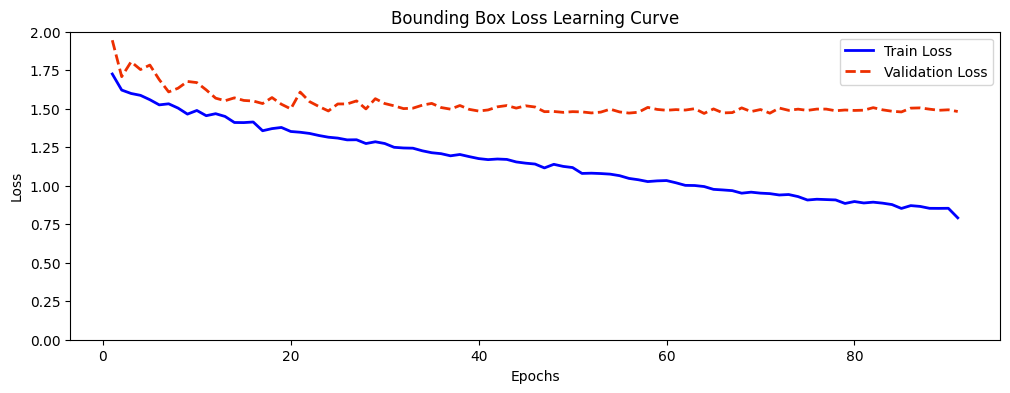

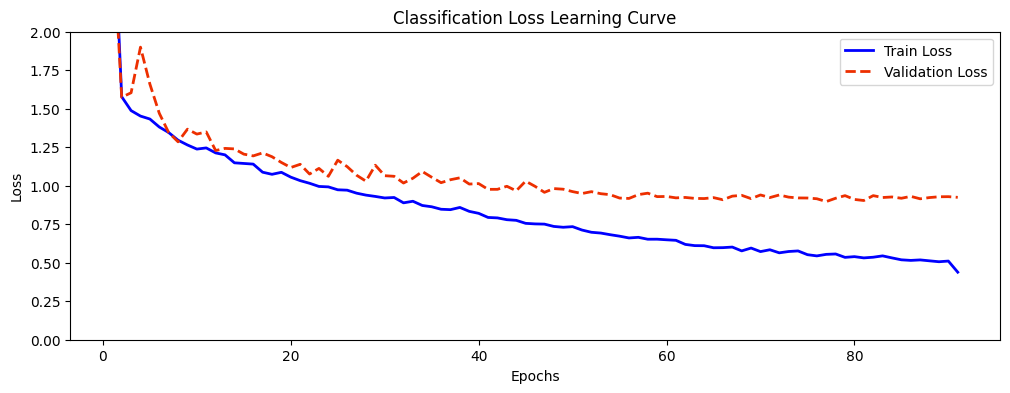

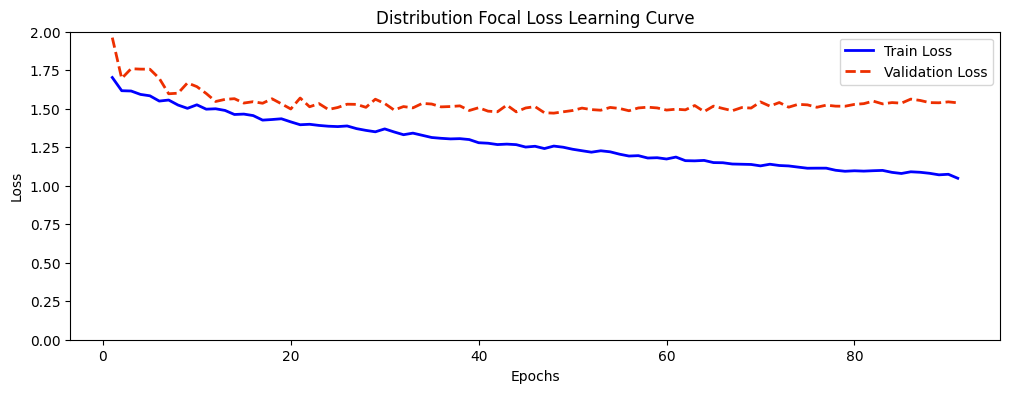

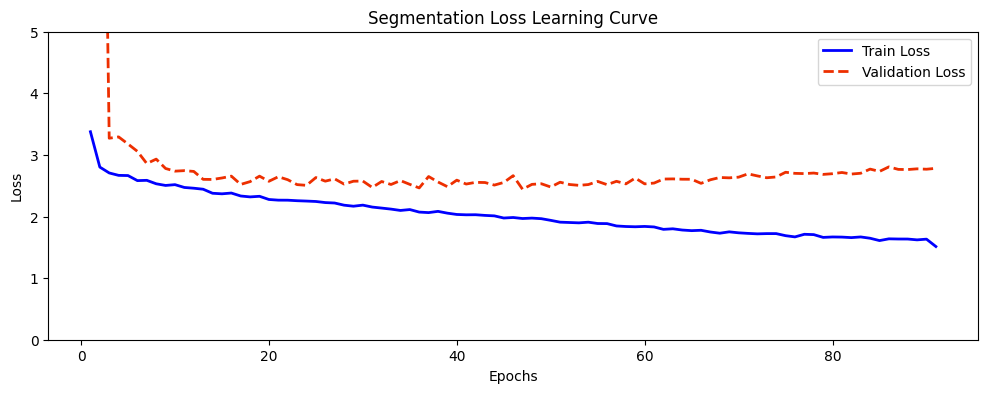

In [ ]:
results_csv_path = '/content/segment/train/results.csv'
df = pd.read_csv(results_csv_path)
df.columns = df.columns.str.strip()

plot_learning_curve(df, 'train/box_loss', 'val/box_loss', 'Bounding Box Loss Learning Curve')
plot_learning_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve')
plot_learning_curve(df, 'train/dfl_loss', 'val/dfl_loss', 'Distribution Focal Loss Learning Curve')
plot_learning_curve(df, 'train/seg_loss', 'val/seg_loss', 'Segmentation Loss Learning Curve', ylim_range=[0,5])

In [ ]:
results = model.train(
   data=yaml_file_path,
   epochs=100,
   imgsz=640,
   patience=15,
   batch=32,
   optimizer='AdamW',
   lr0=0.001,
   lrf=0.1,
   device=0,
   seed=42,
   dropout=0.25
)

Ultralytics 8.3.138 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/PotholeDataset/Pothole_Segmentation_YOLOv8/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.25, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=15, perspective=0.

100%|██████████| 755k/755k [00:00<00:00, 27.1MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n-seg summary: 151 layers, 3,263,811 parameters, 3,263,795 gradients, 12.1 GFLOPs

Transferred 381/417 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 82.3MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 767.9±286.8 MB/s, size: 55.0 KB)


train: Scanning /content/PotholeDataset/Pothole_Segmentation_YOLOv8/train/labels... 680 images, 0 backgrounds, 0 corrupt: 100%|██████████| 680/680 [00:00<00:00, 1546.88it/s]

train: New cache created: /content/PotholeDataset/Pothole_Segmentation_YOLOv8/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 436.6±74.8 MB/s, size: 98.1 KB)


val: Scanning /content/PotholeDataset/Pothole_Segmentation_YOLOv8/valid/labels... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 1205.57it/s]

val: New cache created: /content/PotholeDataset/Pothole_Segmentation_YOLOv8/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.96G      1.522       3.41      2.599      1.472         44        640: 100%|██████████| 22/22 [00:21<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]

                   all         60        201    0.00965      0.209     0.0225    0.00807    0.00574      0.124    0.00373   0.000967



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.09G      1.447      2.485      1.646      1.399         25        640: 100%|██████████| 22/22 [00:19<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]

                   all         60        201     0.0683     0.0398      0.016    0.00561    0.00703      0.114    0.00597    0.00153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.12G      1.399      2.348      1.507      1.377         24        640: 100%|██████████| 22/22 [00:18<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.25s/it]

                   all         60        201      0.298      0.184      0.145     0.0688      0.298      0.174      0.134     0.0524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.14G       1.36       2.22      1.402      1.339         32        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.68s/it]

                   all         60        201      0.255      0.179      0.136     0.0586      0.293      0.134      0.119     0.0441



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.16G      1.379      2.222      1.365      1.332         28        640: 100%|██████████| 22/22 [00:16<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]

                   all         60        201      0.506      0.338      0.381      0.173      0.521      0.348      0.368      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.18G      1.349      2.175      1.269      1.322         40        640: 100%|██████████| 22/22 [00:16<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

                   all         60        201      0.489      0.308      0.322      0.138      0.531      0.316       0.34      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100       6.2G      1.339      2.139      1.257        1.3         41        640: 100%|██████████| 22/22 [00:16<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.58s/it]

                   all         60        201      0.322      0.313      0.259      0.134      0.323      0.254      0.205     0.0971



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.21G      1.308      2.145      1.229       1.31         16        640: 100%|██████████| 22/22 [00:18<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.75s/it]

                   all         60        201      0.492      0.592      0.521      0.275      0.531      0.522      0.523      0.263



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.23G      1.291      2.073      1.171      1.293         32        640: 100%|██████████| 22/22 [00:16<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.68s/it]

                   all         60        201      0.567      0.542      0.537      0.304       0.55      0.532      0.512      0.266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.25G      1.273      2.075      1.148      1.259         46        640: 100%|██████████| 22/22 [00:20<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]

                   all         60        201      0.449      0.527      0.416      0.202       0.49      0.458      0.382      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.27G      1.246      2.013      1.092      1.246         47        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.63s/it]

                   all         60        201      0.595      0.537       0.55      0.312      0.604      0.522      0.556      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.29G      1.257       1.98      1.077      1.255         47        640: 100%|██████████| 22/22 [00:17<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]

                   all         60        201      0.646      0.555      0.595      0.321      0.671      0.582       0.61      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.31G      1.221      1.931       1.06      1.239         37        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

                   all         60        201      0.722      0.498      0.595      0.328       0.71      0.522      0.594      0.327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.32G      1.194      1.928      1.013      1.219         39        640: 100%|██████████| 22/22 [00:16<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]

                   all         60        201      0.624      0.587      0.624      0.384      0.692      0.562       0.64      0.345



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.34G      1.179      1.878     0.9857        1.2         51        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.66s/it]

                   all         60        201      0.591      0.474      0.475      0.249      0.549      0.443      0.431      0.214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.36G      1.161       1.83     0.9396      1.197         27        640: 100%|██████████| 22/22 [00:16<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]

                   all         60        201      0.529      0.488      0.463      0.251      0.523      0.483      0.451      0.225



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.38G       1.16      1.849     0.9464      1.198         25        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.78s/it]

                   all         60        201      0.628      0.604      0.626      0.348      0.644       0.62      0.656      0.359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100       6.4G       1.16      1.838     0.9542      1.198         39        640: 100%|██████████| 22/22 [00:16<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.66s/it]

                   all         60        201      0.628      0.592      0.633      0.372      0.688      0.567      0.635      0.351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.42G      1.151      1.824     0.9435      1.178         29        640: 100%|██████████| 22/22 [00:17<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]

                   all         60        201      0.646      0.627      0.642      0.355      0.668      0.597      0.647      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.44G      1.141      1.796     0.8995      1.182         23        640: 100%|██████████| 22/22 [00:17<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]

                   all         60        201      0.632      0.597       0.61      0.347      0.627      0.592      0.593      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.46G      1.135      1.822     0.9246      1.188         31        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]

                   all         60        201      0.629      0.589      0.617      0.373      0.622      0.562      0.589      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.47G      1.077      1.795     0.8634      1.168         21        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.57s/it]

                   all         60        201      0.518      0.557      0.493      0.269      0.515      0.512      0.469      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.49G      1.109      1.758     0.8448      1.171         36        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.39s/it]

                   all         60        201      0.634      0.622      0.618      0.352      0.654      0.637       0.65      0.336



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.51G      1.082      1.762     0.8658      1.149         38        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.59s/it]

                   all         60        201      0.656      0.646      0.641      0.374      0.696      0.682      0.685       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.53G      1.077      1.751     0.8513      1.155         31        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.67s/it]

                   all         60        201      0.641      0.632      0.625      0.348      0.665      0.603      0.632      0.345



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.54G      1.086      1.774     0.8401      1.145         34        640: 100%|██████████| 22/22 [00:18<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.74s/it]

                   all         60        201      0.715      0.597      0.646      0.363      0.699      0.637      0.654      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.57G      1.055      1.716      0.818      1.138         38        640: 100%|██████████| 22/22 [00:16<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.56s/it]

                   all         60        201      0.668      0.612      0.624      0.336      0.668      0.582      0.617      0.336



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.58G      1.057      1.742     0.8334      1.143         38        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]

                   all         60        201      0.599       0.67      0.636      0.359      0.601       0.69      0.662      0.357



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100       6.6G      1.065      1.689     0.8184      1.145         45        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.55s/it]

                   all         60        201      0.685      0.577      0.624      0.349      0.691      0.582      0.634      0.348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.62G      1.062      1.708     0.8153      1.135         60        640: 100%|██████████| 22/22 [00:16<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.49s/it]

                   all         60        201      0.643      0.601      0.607      0.344      0.696      0.569      0.605      0.335



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.64G      1.016      1.641     0.7548      1.114         34        640: 100%|██████████| 22/22 [00:16<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.60s/it]

                   all         60        201      0.639      0.633      0.637      0.367      0.664      0.657      0.673      0.347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.66G     0.9836      1.588     0.7215      1.097         32        640: 100%|██████████| 22/22 [00:16<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all         60        201      0.704      0.592       0.68      0.407      0.741      0.607      0.702      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.68G     0.9979      1.615     0.7343       1.11         23        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.69s/it]

                   all         60        201      0.735      0.637      0.691      0.402      0.752      0.652      0.719      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100       6.7G      1.011      1.617     0.7448      1.117         37        640: 100%|██████████| 22/22 [00:16<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.69s/it]

                   all         60        201      0.634      0.597      0.641       0.38      0.617      0.622      0.641      0.355



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.71G     0.9992      1.604     0.7292      1.099         41        640: 100%|██████████| 22/22 [00:16<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]

                   all         60        201      0.709      0.617      0.657      0.385       0.71      0.608      0.653      0.356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.73G     0.9879      1.593     0.7337      1.089         32        640: 100%|██████████| 22/22 [00:16<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]

                   all         60        201      0.661       0.64      0.655      0.377      0.666      0.645      0.667      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.75G     0.9935      1.586     0.7078      1.095         39        640: 100%|██████████| 22/22 [00:16<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.72s/it]

                   all         60        201      0.665      0.642      0.656      0.376      0.697      0.682      0.685      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.77G     0.9898      1.598     0.7371      1.094         25        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.72s/it]

                   all         60        201      0.652      0.617      0.669      0.408      0.667      0.622      0.678      0.397



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.79G     0.9671      1.567     0.6986      1.082         26        640: 100%|██████████| 22/22 [00:16<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.76s/it]

                   all         60        201      0.639        0.6      0.628       0.38      0.654      0.612      0.646       0.37



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.81G     0.9489      1.534      0.682      1.071         26        640: 100%|██████████| 22/22 [00:17<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]

                   all         60        201      0.691      0.624      0.647      0.386      0.716      0.652      0.684      0.374



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.83G     0.9502      1.536     0.6787      1.073         27        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.64s/it]

                   all         60        201      0.749      0.562      0.635      0.378      0.785      0.572      0.672      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.84G     0.9529      1.549     0.6906      1.076         39        640: 100%|██████████| 22/22 [00:16<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]

                   all         60        201      0.633      0.647      0.645      0.382      0.643      0.652      0.649      0.369



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.86G     0.9588      1.519     0.7018      1.098         27        640: 100%|██████████| 22/22 [00:16<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all         60        201      0.751      0.602      0.674       0.38      0.741      0.599      0.683      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.88G     0.9283      1.495     0.6714      1.074         23        640: 100%|██████████| 22/22 [00:16<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.26s/it]

                   all         60        201      0.634      0.672      0.652      0.379      0.639      0.677      0.667      0.361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100       6.9G     0.9398      1.537     0.6668      1.049         27        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.60s/it]

                   all         60        201      0.673      0.642      0.661      0.387      0.668      0.642      0.654      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.92G     0.9171      1.489     0.6503      1.057         15        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all         60        201      0.641      0.667      0.653       0.41      0.673      0.697      0.688      0.387



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.94G     0.9058      1.469      0.632      1.049         53        640: 100%|██████████| 22/22 [00:17<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.55s/it]

                   all         60        201      0.751      0.647      0.697      0.403      0.773      0.652      0.728      0.388



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.96G     0.9182      1.507     0.6476      1.052         43        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.73s/it]

                   all         60        201      0.785      0.522      0.652      0.386      0.815      0.542      0.679      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.97G     0.9031      1.495     0.6489      1.084         20        640: 100%|██████████| 22/22 [00:17<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]

                   all         60        201      0.691      0.617       0.64      0.376      0.702      0.627      0.655       0.36



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.99G      0.908      1.484     0.6234       1.06         29        640: 100%|██████████| 22/22 [00:16<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.65s/it]

                   all         60        201      0.616      0.637      0.608      0.351      0.621      0.642      0.618       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.01G     0.9226      1.461     0.6389      1.062         32        640: 100%|██████████| 22/22 [00:16<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.26s/it]

                   all         60        201      0.642      0.669      0.661      0.385      0.656      0.674      0.675      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.03G     0.9065      1.517     0.6393      1.049         37        640: 100%|██████████| 22/22 [00:17<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.73s/it]

                   all         60        201      0.672      0.612      0.643      0.387      0.688      0.624      0.662      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.05G     0.8921      1.455     0.6204      1.048         43        640: 100%|██████████| 22/22 [00:16<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.74s/it]

                   all         60        201      0.656      0.622       0.65       0.39      0.683      0.647      0.685      0.386
EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 38, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



53 epochs completed in 0.294 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.138 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]


                   all         60        201      0.623      0.657      0.668      0.408      0.666      0.624      0.677      0.396
Speed: 0.3ms preprocess, 3.6ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/segment/train


In [ ]:
metrics = model.val(split='test', imgsz=640, batch=32, augment=True)


Ultralytics 8.3.138 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 655.5±224.2 MB/s, size: 71.7 KB)


val: Scanning /content/PotholeDataset/Pothole_Segmentation_YOLOv8/test/labels... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<00:00, 986.59it/s]

val: New cache created: /content/PotholeDataset/Pothole_Segmentation_YOLOv8/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:01<00:01,  1.97s/it]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]


                   all         40        204        0.9      0.707      0.851      0.524      0.906      0.712      0.849      0.463
Speed: 7.5ms preprocess, 14.4ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/segment/train2


In [ ]:
metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])
metrics_df.round(3)

,Metric Value
metrics/precision(B),0.900
metrics/recall(B),0.707
metrics/mAP50(B),0.851
metrics/mAP50-95(B),0.524
metrics/precision(M),0.906
metrics/recall(M),0.712
metrics/mAP50(M),0.849
metrics/mAP50-95(M),0.463
fitness,1.058


In [ ]:
def plot_learning_curve(df, train_loss_col, val_loss_col, title, ylim_range=[0,2]):
    plt.figure(figsize=(12, 4))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train Loss', color='blue', linestyle='-', linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation Loss', color='#ed2f00', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(ylim_range)
    plt.legend()
    plt.show()

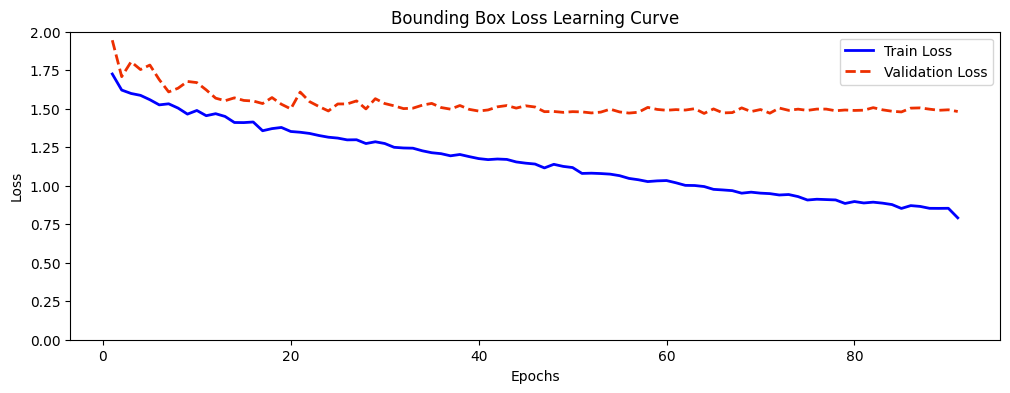

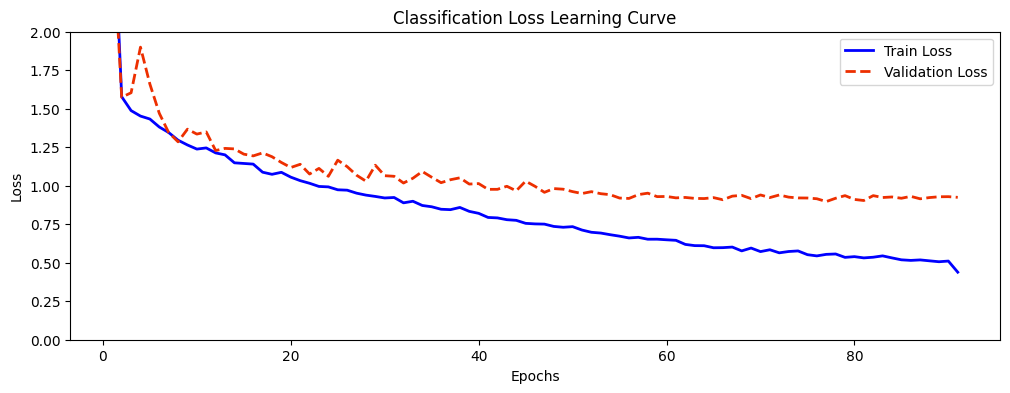

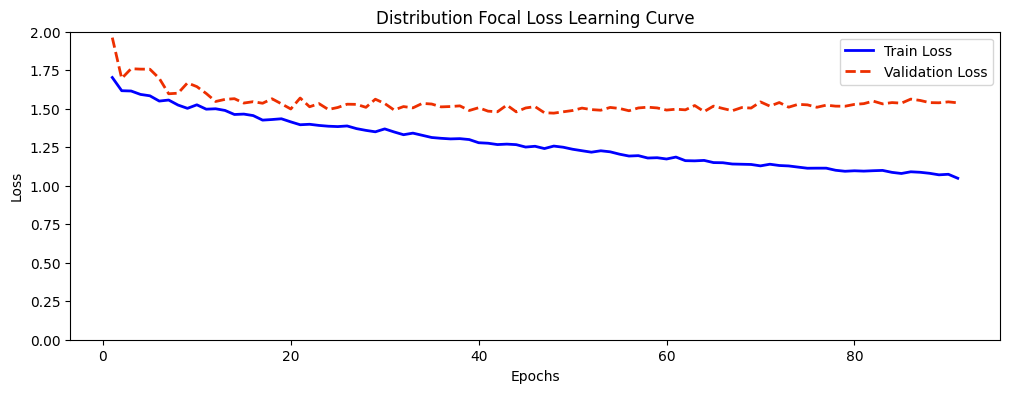

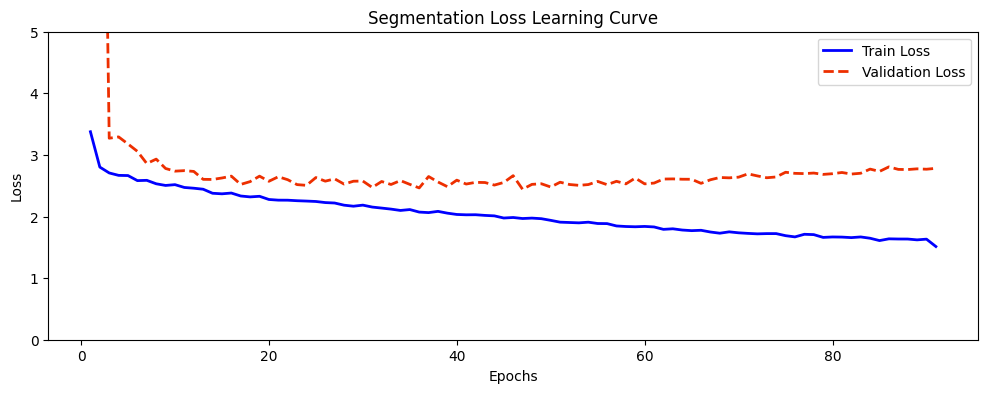

In [ ]:
results_csv_path = '/content/segment/train/results.csv'
df = pd.read_csv(results_csv_path)
df.columns = df.columns.str.strip()

plot_learning_curve(df, 'train/box_loss', 'val/box_loss', 'Bounding Box Loss Learning Curve')
plot_learning_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve')
plot_learning_curve(df, 'train/dfl_loss', 'val/dfl_loss', 'Distribution Focal Loss Learning Curve')
plot_learning_curve(df, 'train/seg_loss', 'val/seg_loss', 'Segmentation Loss Learning Curve', ylim_range=[0,5])

# New Model Fine tuning

In [ ]:
results = model.train(
    data=yaml_file_path,
    epochs=150,
    imgsz=640,
    patience=20,
    batch=16,
    optimizer='AdamW',
    lr0=0.0005,
    lrf=0.05,
    dropout=0.2,
    device=0,
    seed=42,
    # Built-in augmentation params
    mosaic=1.0,
    mixup=0.5,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    translate=0.1,
    scale=0.5,
    degrees=0.0,
    shear=0.0
)


Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/PotholeDataset/Pothole_Segmentation_YOLOv8/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.2, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.05, mask_ratio=4, max_det=300, mixup=0.5, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=20, perspective=0

100%|██████████| 755k/755k [00:00<00:00, 147MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 22        [15, 18, 21]  1   1004275  ultralytics.nn.modules.head.Segment          [1, 32, 64, [64, 128, 256]]   
YOLOv8n-seg summary: 151 layers, 3,263,811 parameters, 3,263,795 gradients, 12.1 GFLOPs

Transferred 381/417 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 281MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1190.2±618.5 MB/s, size: 55.0 KB)


train: Scanning /content/PotholeDataset/Pothole_Segmentation_YOLOv8/train/labels... 680 images, 0 backgrounds, 0 corrupt: 100%|██████████| 680/680 [00:00<00:00, 1969.34it/s]

train: New cache created: /content/PotholeDataset/Pothole_Segmentation_YOLOv8/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 404.0±207.2 MB/s, size: 98.1 KB)


val: Scanning /content/PotholeDataset/Pothole_Segmentation_YOLOv8/valid/labels... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 1500.73it/s]

val: New cache created: /content/PotholeDataset/Pothole_Segmentation_YOLOv8/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: AdamW(lr=0.0005, momentum=0.937) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.73G      1.833      3.772      2.658      1.722         72        640: 100%|██████████| 43/43 [00:23<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         60        201     0.0065      0.582     0.0178    0.00683    0.00494      0.443    0.00685    0.00176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/150      3.35G      1.737      3.179      2.068      1.642         55        640: 100%|██████████| 43/43 [00:18<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         60        201      0.529      0.363      0.394      0.215      0.481      0.303      0.308      0.098



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/150      3.37G      1.645      3.021      1.931      1.584         49        640: 100%|██████████| 43/43 [00:21<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         60        201      0.506      0.448      0.436      0.223      0.502      0.418      0.409      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/150      3.39G      1.611       3.02        1.9      1.579         34        640: 100%|██████████| 43/43 [00:19<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.08s/it]

                   all         60        201      0.689      0.582      0.638      0.307      0.681      0.582      0.633      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/150      3.41G      1.582      2.885      1.779      1.532         55        640: 100%|██████████| 43/43 [00:18<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         60        201      0.566       0.59      0.602      0.307      0.564      0.574      0.587      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/150      3.43G      1.578      2.911      1.794      1.538         57        640: 100%|██████████| 43/43 [00:19<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         60        201      0.603      0.613      0.629      0.335      0.629      0.607      0.636      0.336



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/150      3.45G      1.546      2.868      1.713      1.517         55        640: 100%|██████████| 43/43 [00:18<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         60        201      0.607      0.607      0.633      0.342      0.619      0.587      0.634      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/150      3.46G      1.524      2.835      1.664      1.482         49        640: 100%|██████████| 43/43 [00:19<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         60        201      0.686      0.612      0.656      0.376      0.686      0.612      0.643      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/150      3.48G      1.509      2.765      1.622      1.485         54        640: 100%|██████████| 43/43 [00:17<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all         60        201      0.661      0.593      0.641      0.371      0.662      0.602       0.64      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/150       3.5G      1.513      2.828      1.624      1.484         35        640: 100%|██████████| 43/43 [00:18<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         60        201      0.641      0.596      0.644      0.363       0.65      0.607      0.656      0.345



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/150      3.53G      1.495      2.732      1.586      1.483         51        640: 100%|██████████| 43/43 [00:19<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all         60        201      0.597      0.619      0.621      0.358      0.603      0.627      0.642      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/150      3.54G      1.496      2.766      1.571      1.491         38        640: 100%|██████████| 43/43 [00:19<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         60        201      0.619      0.682      0.689      0.401      0.606      0.667      0.674      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/150      3.56G       1.49       2.75      1.583       1.48         55        640: 100%|██████████| 43/43 [00:18<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         60        201      0.689      0.627      0.651      0.365      0.697      0.629      0.659      0.364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/150      3.57G      1.467      2.684      1.515      1.458         63        640: 100%|██████████| 43/43 [00:18<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all         60        201      0.587      0.642      0.641      0.363      0.602      0.652      0.653      0.361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/150       3.6G      1.423      2.636      1.487      1.441         43        640: 100%|██████████| 43/43 [00:17<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         60        201      0.647      0.629      0.689      0.403      0.676      0.617      0.689      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/150      3.62G      1.442      2.657       1.47      1.442         40        640: 100%|██████████| 43/43 [00:18<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         60        201      0.657      0.642      0.679        0.4      0.655      0.642      0.672       0.39



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/150      3.63G      1.463      2.666      1.468      1.434         62        640: 100%|██████████| 43/43 [00:18<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         60        201      0.652      0.667      0.692      0.403      0.666      0.637      0.694       0.39



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/150      3.65G      1.415      2.654      1.431      1.424         47        640: 100%|██████████| 43/43 [00:19<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         60        201      0.676      0.657      0.682      0.394      0.681      0.662      0.691      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/150      3.67G      1.416      2.621      1.417      1.413         42        640: 100%|██████████| 43/43 [00:17<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         60        201      0.643      0.726      0.682      0.378      0.638       0.72      0.675      0.376



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/150      3.69G      1.398      2.587      1.388      1.404         49        640: 100%|██████████| 43/43 [00:18<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         60        201      0.687      0.632      0.622       0.36      0.675      0.627       0.62      0.351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/150       3.7G      1.397      2.595      1.401      1.401         62        640: 100%|██████████| 43/43 [00:17<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all         60        201      0.698      0.587      0.664       0.39      0.698      0.585      0.669       0.38



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/150      3.72G      1.391      2.539      1.366      1.389         65        640: 100%|██████████| 43/43 [00:18<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         60        201      0.657      0.602       0.66      0.372      0.674      0.607      0.672       0.36



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/150      3.75G      1.409      2.648      1.397      1.402         49        640: 100%|██████████| 43/43 [00:18<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         60        201      0.647      0.652      0.678      0.379      0.704      0.622      0.679      0.371



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/150      3.76G      1.382      2.603      1.395      1.402         46        640: 100%|██████████| 43/43 [00:18<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         60        201      0.588      0.652      0.656      0.375      0.599      0.642      0.657      0.372



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/150      3.78G      1.369      2.586      1.383      1.389         42        640: 100%|██████████| 43/43 [00:19<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         60        201      0.662      0.642       0.67      0.393      0.684      0.662      0.693       0.39



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/150       3.8G      1.365      2.589      1.367      1.388         65        640: 100%|██████████| 43/43 [00:18<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all         60        201      0.675      0.607      0.668      0.423      0.694      0.622      0.685      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/150      3.81G      1.361      2.529       1.35      1.368         63        640: 100%|██████████| 43/43 [00:18<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         60        201      0.664      0.629       0.68      0.422      0.674      0.617       0.68      0.394



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/150      3.84G      1.321      2.509      1.304       1.36         36        640: 100%|██████████| 43/43 [00:18<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         60        201      0.701      0.637      0.672        0.4      0.701      0.637       0.67      0.388



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/150      3.85G      1.364      2.556      1.303      1.374         29        640: 100%|██████████| 43/43 [00:18<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         60        201      0.651      0.711      0.686      0.408      0.657      0.715      0.691      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/150      3.87G      1.352      2.482      1.288      1.374         49        640: 100%|██████████| 43/43 [00:19<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         60        201      0.697      0.628      0.686      0.423      0.701      0.628      0.681      0.397



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/150      3.89G      1.348      2.533      1.307      1.375         39        640: 100%|██████████| 43/43 [00:18<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         60        201      0.686      0.706      0.683      0.404      0.679      0.697      0.684      0.392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/150      3.91G      1.354      2.577      1.328      1.382         53        640: 100%|██████████| 43/43 [00:18<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         60        201      0.676      0.697      0.694        0.4      0.667      0.687      0.677      0.365



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/150      3.92G      1.369      2.538      1.323      1.391         68        640: 100%|██████████| 43/43 [00:18<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all         60        201      0.724      0.637      0.694      0.387      0.724      0.637      0.704      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/150      3.95G      1.344       2.54      1.303      1.376         49        640: 100%|██████████| 43/43 [00:17<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         60        201      0.664      0.648       0.67      0.394      0.663      0.647      0.666      0.378



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/150      3.96G      1.314      2.483      1.251      1.353         78        640: 100%|██████████| 43/43 [00:18<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         60        201      0.692      0.637      0.677      0.405      0.702      0.647      0.676      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/150      3.98G      1.322      2.441      1.246      1.353         48        640: 100%|██████████| 43/43 [00:17<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         60        201      0.688      0.672      0.646      0.378      0.678      0.662       0.62      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/150         4G      1.309      2.492      1.245      1.348         75        640: 100%|██████████| 43/43 [00:18<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         60        201       0.59      0.701      0.664      0.393      0.728      0.571      0.658      0.376



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/150      4.02G      1.324      2.465      1.253       1.35         52        640: 100%|██████████| 43/43 [00:18<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         60        201      0.628      0.731      0.726      0.428      0.657      0.721      0.721      0.413



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/150      4.04G      1.333      2.503       1.29      1.364         37        640: 100%|██████████| 43/43 [00:18<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         60        201      0.703      0.701      0.725      0.411      0.709      0.706      0.725      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/150      4.06G      1.296      2.413      1.215      1.323         43        640: 100%|██████████| 43/43 [00:17<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all         60        201       0.69      0.652      0.689      0.411      0.696      0.657        0.7      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/150      4.07G      1.313      2.469      1.244      1.349         59        640: 100%|██████████| 43/43 [00:18<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         60        201      0.736      0.637      0.689      0.399      0.747      0.647      0.708      0.394



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/150       4.1G      1.305      2.475      1.237      1.346         43        640: 100%|██████████| 43/43 [00:18<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         60        201      0.689      0.632      0.689      0.403      0.704       0.64      0.704      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/150      4.11G      1.311      2.482      1.247      1.346         60        640: 100%|██████████| 43/43 [00:18<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         60        201      0.712      0.602      0.675      0.395      0.729      0.614      0.685      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/150      4.13G      1.284      2.404      1.181       1.32         38        640: 100%|██████████| 43/43 [00:19<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         60        201      0.717      0.657      0.725      0.419      0.728      0.665      0.726      0.401



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/150      4.15G      1.295      2.466      1.212      1.346         37        640: 100%|██████████| 43/43 [00:18<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         60        201      0.689      0.672      0.716      0.432      0.709      0.687      0.727      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/150      4.17G      1.269       2.42      1.208      1.323         38        640: 100%|██████████| 43/43 [00:19<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         60        201      0.744      0.635      0.722      0.414      0.702       0.68      0.731      0.411



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/150      4.19G      1.268      2.385      1.167      1.314         55        640: 100%|██████████| 43/43 [00:17<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all         60        201      0.692      0.592      0.687      0.412      0.709      0.602      0.688        0.4



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/150       4.2G      1.252       2.36      1.147      1.314         51        640: 100%|██████████| 43/43 [00:18<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         60        201      0.722      0.657      0.744      0.413      0.722      0.657      0.733      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/150      4.22G      1.271      2.404       1.16      1.305         48        640: 100%|██████████| 43/43 [00:18<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.00it/s]

                   all         60        201      0.686      0.662      0.713      0.411      0.694      0.676      0.719      0.399



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/150      4.25G      1.266      2.346      1.167      1.311         27        640: 100%|██████████| 43/43 [00:17<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         60        201      0.654      0.652      0.668      0.406      0.668      0.629      0.663      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/150      4.26G      1.289      2.416       1.19      1.328         74        640: 100%|██████████| 43/43 [00:19<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         60        201      0.678      0.647      0.699      0.415      0.701      0.662      0.712        0.4



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/150      4.28G      1.265      2.353       1.14      1.313         45        640: 100%|██████████| 43/43 [00:17<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         60        201      0.654      0.694      0.696      0.418      0.658      0.699      0.711      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/150      4.29G      1.263      2.374      1.191      1.316         69        640: 100%|██████████| 43/43 [00:19<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         60        201      0.719      0.701      0.719      0.405      0.736      0.693      0.721      0.401



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/150      4.31G      1.279      2.413      1.184      1.328         56        640: 100%|██████████| 43/43 [00:18<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         60        201      0.698      0.667      0.726      0.423      0.701      0.662       0.72      0.402



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/150      4.34G      1.267      2.424      1.172      1.305         33        640: 100%|██████████| 43/43 [00:19<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         60        201      0.668      0.681      0.698      0.393      0.679      0.694      0.697      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/150      4.36G      1.244      2.339      1.141      1.306         39        640: 100%|██████████| 43/43 [00:17<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all         60        201      0.613      0.657      0.691      0.414      0.754      0.595      0.708      0.405



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/150      4.37G      1.251      2.384      1.156      1.315         40        640: 100%|██████████| 43/43 [00:18<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         60        201      0.752      0.637      0.714      0.429      0.759      0.637      0.724      0.423



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/150      4.39G      1.249      2.383      1.149      1.299         48        640: 100%|██████████| 43/43 [00:19<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all         60        201      0.661      0.717      0.738      0.427      0.675      0.716       0.74      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/150      4.41G      1.271      2.426      1.188      1.325         42        640: 100%|██████████| 43/43 [00:18<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         60        201       0.69      0.647      0.707      0.423      0.719      0.657      0.732       0.42



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/150      4.43G      1.208      2.285      1.099      1.279         59        640: 100%|██████████| 43/43 [00:19<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         60        201      0.694      0.642      0.695      0.415      0.689      0.637      0.692      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/150      4.45G      1.241       2.35      1.132      1.296         43        640: 100%|██████████| 43/43 [00:18<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         60        201       0.72      0.614      0.715      0.438      0.737      0.628      0.734      0.408



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/150      4.46G      1.219      2.324      1.107      1.284         75        640: 100%|██████████| 43/43 [00:18<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         60        201      0.674      0.677      0.736      0.451      0.693      0.687      0.746      0.434



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/150      4.48G      1.232      2.316      1.101      1.287         51        640: 100%|██████████| 43/43 [00:17<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.09s/it]

                   all         60        201      0.755      0.627      0.737      0.447      0.755      0.627      0.729      0.429



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/150       4.5G      1.189       2.28       1.09      1.264         38        640: 100%|██████████| 43/43 [00:18<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         60        201      0.688      0.667      0.715      0.431      0.704      0.682       0.73       0.41



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/150      4.52G      1.253      2.367      1.127      1.301         24        640: 100%|██████████| 43/43 [00:19<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         60        201      0.695      0.677      0.714       0.42       0.71      0.687      0.724      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/150      4.54G      1.227       2.36      1.136      1.289         47        640: 100%|██████████| 43/43 [00:18<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         60        201      0.691      0.637        0.7      0.429      0.707      0.652      0.716      0.417



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/150      4.55G      1.221      2.317      1.115      1.283         45        640: 100%|██████████| 43/43 [00:19<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         60        201      0.722       0.62      0.693      0.411      0.759      0.622        0.7      0.395



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/150      4.57G       1.19      2.308      1.094      1.268         52        640: 100%|██████████| 43/43 [00:18<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all         60        201      0.696      0.632      0.655      0.402      0.742      0.637      0.673      0.388



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/150      4.59G      1.205      2.339      1.097       1.28         49        640: 100%|██████████| 43/43 [00:18<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         60        201      0.666      0.665      0.695      0.419      0.673      0.677      0.709      0.408



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/150      4.61G      1.222      2.337      1.125      1.294         56        640: 100%|██████████| 43/43 [00:19<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         60        201      0.752      0.672       0.74      0.436      0.764      0.682      0.758      0.425



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/150      4.63G        1.2      2.275      1.097      1.279         33        640: 100%|██████████| 43/43 [00:17<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         60        201      0.776      0.637       0.72      0.431        0.8      0.658      0.748      0.423



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/150      4.65G      1.166      2.287       1.05      1.257         60        640: 100%|██████████| 43/43 [00:18<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         60        201      0.674      0.692      0.693      0.413      0.701      0.687      0.705      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/150      4.67G      1.222      2.287      1.107      1.276         49        640: 100%|██████████| 43/43 [00:17<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         60        201      0.738      0.672      0.713      0.425      0.759      0.689      0.735      0.412



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/150      4.69G      1.165      2.255      1.025      1.248         44        640: 100%|██████████| 43/43 [00:19<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         60        201      0.705      0.712      0.737      0.455      0.731      0.703       0.75      0.425



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/150      4.71G      1.186      2.338      1.059      1.262         44        640: 100%|██████████| 43/43 [00:18<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all         60        201      0.648      0.679      0.721      0.435      0.639      0.669      0.694      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/150      4.72G      1.188      2.253      1.052      1.258         61        640: 100%|██████████| 43/43 [00:18<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         60        201       0.72      0.627      0.726      0.447      0.729      0.642      0.733      0.432



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/150      4.74G      1.175       2.27      1.053      1.262         68        640: 100%|██████████| 43/43 [00:19<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         60        201      0.749      0.677      0.728      0.427      0.755      0.682      0.734      0.409



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/150      4.76G      1.182      2.323      1.097      1.271         40        640: 100%|██████████| 43/43 [00:17<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         60        201      0.756      0.652      0.723      0.418      0.728      0.697      0.735      0.413



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/150      4.78G       1.17      2.237      1.036      1.247         60        640: 100%|██████████| 43/43 [00:18<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         60        201      0.739      0.657      0.727      0.437      0.739      0.657      0.722      0.408



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/150       4.8G      1.197      2.334      1.083      1.264         48        640: 100%|██████████| 43/43 [00:18<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         60        201      0.722      0.646      0.703      0.426      0.686      0.652      0.694      0.403



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/150      4.81G      1.181      2.295      1.051      1.247         63        640: 100%|██████████| 43/43 [00:19<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         60        201      0.765      0.627      0.728      0.441      0.778      0.637      0.736      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/150      4.83G      1.161      2.259      1.048      1.246         48        640: 100%|██████████| 43/43 [00:18<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all         60        201      0.665      0.682      0.701      0.419       0.67      0.687      0.701      0.411
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 62, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



82 epochs completed in 0.467 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:00<00:00,  1.98it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]


                   all         60        201      0.677      0.677      0.737      0.453      0.741      0.652      0.747      0.434
Speed: 0.3ms preprocess, 5.3ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/segment/train


In [ ]:
model=YOLO('/content/runs/segment/train/weights/best.pt')
metrics = model.val(split='test', imgsz=640, batch=16, augment=True, conf=0.2)
metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])
metrics_df.round(3)

Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1553.9±351.0 MB/s, size: 85.3 KB)


val: Scanning /content/PotholeDataset/Pothole_Segmentation_YOLOv8/test/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:00<00:01,  1.54it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [00:01<00:00,  1.35it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]


                   all         40        204      0.779      0.775       0.83      0.562      0.751      0.814      0.828      0.501
Speed: 5.7ms preprocess, 10.4ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/segment/val3


,Metric Value
metrics/precision(B),0.779
metrics/recall(B),0.775
metrics/mAP50(B),0.830
metrics/mAP50-95(B),0.562
metrics/precision(M),0.751
metrics/recall(M),0.814
metrics/mAP50(M),0.828
metrics/mAP50-95(M),0.501
fitness,1.123


# Model Fine tuning

In [ ]:
!unzip /content/Pothole_Segmentation_YOLOv8.zip -d /content

In [ ]:
import os
import yaml

dataset_path = '/content/Pothole_Segmentation_YOLOv8'
yaml_file_path = os.path.join(dataset_path, 'data.yaml')


In [ ]:
!pip install ultralytics

import warnings
warnings.filterwarnings('ignore')
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
from PIL import Image
from collections import deque
from ultralytics import YOLO
from IPython.display import Video

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
model = YOLO('yolov8s-seg.pt')

100%|██████████| 22.8M/22.8M [00:00<00:00, 116MB/s] 


In [ ]:
results = model.train(
   data=yaml_file_path,
   epochs=100,
   imgsz=640,
   patience=15,
   batch=32,
   optimizer='AdamW',
   lr0=0.0001,
   lrf=0.01,
   device=0,
   seed=42,
   dropout=0.25
)

metrics = model.val(split='test', imgsz=640, batch=32, augment=True)
metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])
metrics_df.round(3)

Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Pothole_Segmentation_YOLOv8/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.25, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=15, perspective=0.0, plots=True

100%|██████████| 755k/755k [00:00<00:00, 21.0MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 22        [15, 18, 21]  1   2770931  ultralytics.nn.modules.head.Segment          [1, 32, 128, [128, 256, 512]] 
YOLOv8s-seg summary: 151 layers, 11,790,483 parameters, 11,790,467 gradients, 42.7 GFLOPs

Transferred 411/417 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 83.0MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 19.0±10.4 MB/s, size: 55.0 KB)


train: Scanning /content/Pothole_Segmentation_YOLOv8/train/labels... 680 images, 0 backgrounds, 0 corrupt: 100%|██████████| 680/680 [00:01<00:00, 486.89it/s]

train: New cache created: /content/Pothole_Segmentation_YOLOv8/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 15.7±9.4 MB/s, size: 98.1 KB)


val: Scanning /content/Pothole_Segmentation_YOLOv8/valid/labels... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 279.00it/s]

val: New cache created: /content/Pothole_Segmentation_YOLOv8/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: AdamW(lr=0.0001, momentum=0.937) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.55G      1.556      3.538      4.014      1.519         44        640: 100%|██████████| 22/22 [00:20<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

                   all         60        201     0.0894      0.179     0.0589     0.0237     0.0167     0.0249    0.00146   0.000264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.78G      1.364      2.354       1.44      1.339         25        640: 100%|██████████| 22/22 [00:16<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all         60        201       0.37      0.463      0.369      0.201       0.12      0.134     0.0468     0.0138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.65G      1.268      2.158      1.215      1.269         24        640: 100%|██████████| 22/22 [00:16<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all         60        201      0.625      0.517      0.587      0.322      0.537      0.392      0.418      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.76G      1.199      2.009      1.101      1.233         32        640: 100%|██████████| 22/22 [00:16<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         60        201      0.598      0.657      0.622      0.371      0.432      0.461       0.35      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.78G      1.196      1.978      1.052      1.219         28        640: 100%|██████████| 22/22 [00:16<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         60        201      0.636      0.612      0.651      0.381      0.632      0.607      0.623      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.83G      1.147      1.889     0.9645      1.198         40        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         60        201      0.651      0.677      0.714      0.438      0.646      0.672      0.714      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.77G        1.1      1.833     0.9098       1.16         41        640: 100%|██████████| 22/22 [00:16<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         60        201      0.723      0.716      0.752       0.45      0.731      0.726      0.752      0.432



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.79G      1.097      1.812     0.8759       1.18         16        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         60        201      0.733      0.652      0.737      0.447      0.745      0.662      0.749      0.412



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.68G      1.094      1.765     0.8433      1.171         32        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         60        201      0.627      0.662      0.685      0.423      0.617      0.647      0.644      0.369



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.85G      1.078      1.776     0.8147       1.14         46        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         60        201      0.707      0.659      0.726      0.453      0.695      0.687      0.716      0.428



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.79G      1.035       1.71     0.7674      1.122         47        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         60        201      0.748      0.663      0.739      0.461      0.745      0.672      0.739      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.85G      1.032      1.666     0.7526      1.124         47        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all         60        201      0.659      0.711       0.71      0.435      0.645      0.697      0.679       0.38



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.84G      1.019      1.639     0.7349      1.124         37        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         60        201      0.698      0.687      0.734      0.459      0.698      0.687      0.736      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.81G     0.9878      1.648     0.7205      1.101         39        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         60        201      0.799      0.642      0.755      0.452      0.793      0.637      0.748      0.443



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.78G     0.9857      1.603      0.708      1.088         51        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         60        201      0.735      0.691      0.718      0.439      0.741      0.682      0.724      0.419



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.82G     0.9616      1.566     0.6772      1.082         27        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         60        201      0.734      0.677       0.73      0.426      0.739      0.682      0.731      0.406



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.86G      0.949      1.567     0.6657       1.07         25        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         60        201       0.74      0.662      0.721      0.446       0.74      0.662       0.71      0.413



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.79G     0.9606      1.555     0.6707      1.086         39        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         60        201       0.75      0.685      0.742      0.468      0.743      0.692      0.743      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.74G     0.9372      1.536     0.6569      1.065         29        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         60        201      0.776      0.662      0.748      0.463      0.758      0.647      0.733      0.418



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.76G     0.9219      1.515     0.6281      1.069         23        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         60        201      0.741      0.642      0.745      0.452      0.718      0.667      0.713      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.79G     0.9151      1.484     0.6171      1.066         31        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         60        201       0.75      0.641      0.733      0.458       0.75      0.641      0.712      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.86G     0.8613      1.479     0.6037       1.04         21        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         60        201      0.669      0.716      0.747      0.455      0.688      0.735      0.741       0.43



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.75G     0.8877      1.481     0.5989       1.05         36        640: 100%|██████████| 22/22 [00:17<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         60        201      0.696      0.726      0.762      0.459      0.723      0.721      0.748      0.437



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.77G     0.8805      1.487     0.6007      1.039         38        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         60        201      0.843      0.617       0.74       0.47      0.836      0.612      0.715      0.428



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.67G     0.8633      1.456     0.5992      1.045         31        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         60        201      0.718      0.659      0.741      0.455      0.729      0.667      0.746      0.447



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.74G     0.8736      1.465     0.5889      1.041         34        640: 100%|██████████| 22/22 [00:17<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.00s/it]

                   all         60        201      0.696      0.695       0.73       0.45      0.699      0.701      0.719      0.424



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.79G     0.8568      1.419     0.5784      1.037         38        640: 100%|██████████| 22/22 [00:16<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         60        201      0.708      0.686      0.721      0.449      0.678      0.711      0.715      0.417



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.76G     0.8489      1.411     0.5722      1.029         38        640: 100%|██████████| 22/22 [00:16<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all         60        201      0.718      0.672      0.714      0.451      0.758      0.647      0.711      0.429



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.76G     0.8428      1.403      0.555      1.032         45        640: 100%|██████████| 22/22 [00:16<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         60        201      0.822      0.642      0.733      0.449      0.809      0.633       0.72      0.428



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100       8.8G     0.8382       1.43     0.5777      1.028         60        640: 100%|██████████| 22/22 [00:16<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all         60        201       0.76      0.612      0.716      0.449      0.738      0.642      0.727      0.434



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.75G     0.8109      1.368     0.5419      1.009         34        640: 100%|██████████| 22/22 [00:17<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         60        201       0.68      0.707      0.721      0.438      0.674      0.711      0.714      0.424



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100       8.8G     0.8028      1.342     0.5116      1.006         32        640: 100%|██████████| 22/22 [00:16<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         60        201      0.764      0.657       0.72      0.441      0.746      0.642      0.713      0.421



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.78G      0.802      1.346     0.5276      1.015         23        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         60        201      0.773      0.661      0.735      0.454      0.776      0.652      0.727      0.436
EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 18, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



33 epochs completed in 0.175 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 23.9MB
Optimizer stripped from runs/segment/train/weights/best.pt, 23.9MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


                   all         60        201       0.75      0.686      0.742      0.468      0.747      0.691      0.743      0.438
Speed: 0.2ms preprocess, 6.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/segment/train
Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 90.7±170.5 MB/s, size: 71.7 KB)


val: Scanning /content/Pothole_Segmentation_YOLOv8/test/labels... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<00:00, 649.01it/s]

val: New cache created: /content/Pothole_Segmentation_YOLOv8/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:01<00:01,  1.17s/it]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]


                   all         40        204      0.806      0.814      0.862      0.586      0.816      0.804      0.854      0.529
Speed: 0.2ms preprocess, 20.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/segment/train2


,Metric Value
metrics/precision(B),0.806
metrics/recall(B),0.814
metrics/mAP50(B),0.862
metrics/mAP50-95(B),0.586
metrics/precision(M),0.816
metrics/recall(M),0.804
metrics/mAP50(M),0.854
metrics/mAP50-95(M),0.529
fitness,1.175


In [ ]:
!zip -r /content/runs_best.zip  /content/runs

from google.colab import files
files.download('/content/runs_best.zip')

  adding: content/runs/ (stored 0%)
  adding: content/runs/segment/ (stored 0%)
  adding: content/runs/segment/train/ (stored 0%)
  adding: content/runs/segment/train/BoxP_curve.png (deflated 16%)
  adding: content/runs/segment/train/confusion_matrix.png (deflated 36%)
  adding: content/runs/segment/train/BoxPR_curve.png (deflated 20%)
  adding: content/runs/segment/train/results.csv (deflated 59%)
  adding: content/runs/segment/train/args.yaml (deflated 51%)
  adding: content/runs/segment/train/MaskR_curve.png (deflated 16%)
  adding: content/runs/segment/train/labels.jpg (deflated 29%)
  adding: content/runs/segment/train/val_batch0_pred.jpg (deflated 4%)
  adding: content/runs/segment/train/MaskF1_curve.png (deflated 17%)
  adding: content/runs/segment/train/train_batch0.jpg (deflated 1%)
  adding: content/runs/segment/train/results.png (deflated 8%)
  adding: content/runs/segment/train/weights/ (stored 0%)
  adding: content/runs/segment/train/weights/best.pt (deflated 8%)
  adding:

# Uploaded Image inference

Saving download (2).jpeg to download (2) (4).jpeg
Image path: download (2) (4).jpeg

image 1/1 /content/download (2) (4).jpeg: 384x640 4 potholes, 464.4ms
Speed: 5.2ms preprocess, 464.4ms inference, 11.5ms postprocess per image at shape (1, 3, 384, 640)


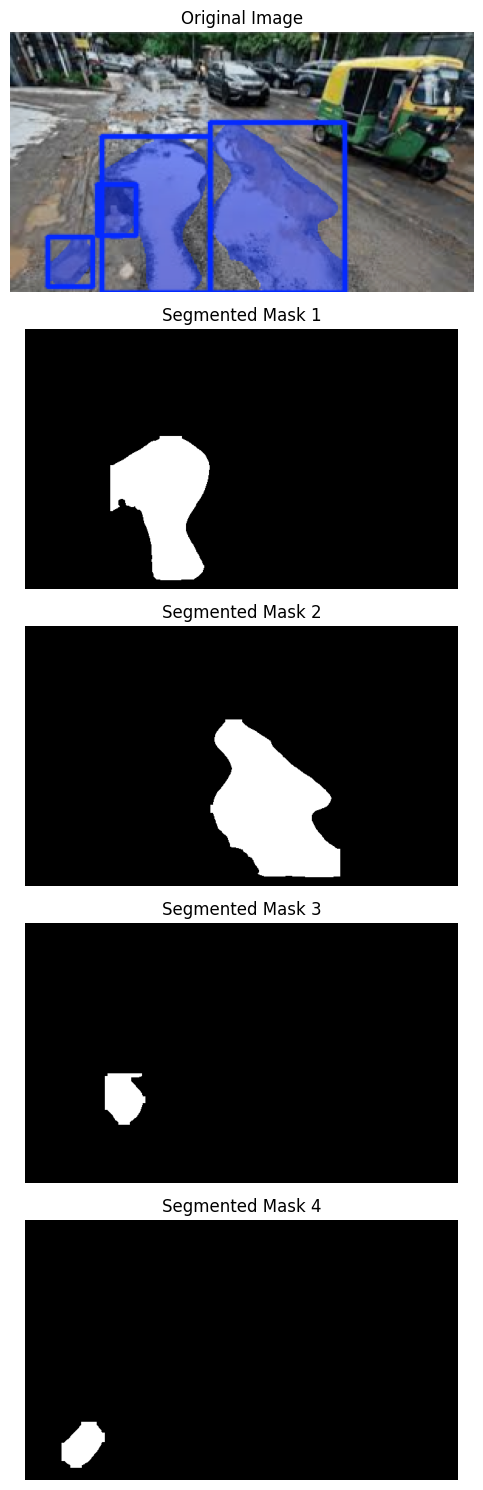

In [ ]:
from google.colab import files
import os

model = YOLO('/content/segment/train/weights/best.pt')

uploaded = files.upload()

file_path = next(iter(uploaded))
print("Image path:", file_path)

results = model.predict(source=file_path, imgsz=640, conf=0.3)
annotated_image = results[0].plot(labels=False)
annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

num_subplots = 1 + (len(results[0].masks.data) if results[0].masks is not None else 0)

# Change figsize and subplots arrangement for vertical layout
fig, axes = plt.subplots(num_subplots, 1, figsize=(5, 15))

axes[0].imshow(annotated_image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

if results[0].masks is not None:
    masks = results[0].masks.data.cpu().numpy()
    for i, mask in enumerate(masks):
        binary_mask = (mask > 0).astype(np.uint8) * 255
        # Adjust index for vertical layout
        axes[i + 1].imshow(binary_mask, cmap='gray')
        axes[i + 1].set_title(f'Segmented Mask {i + 1}')
        axes[i + 1].axis('off')

plt.tight_layout()
plt.show()